# Data Analysis

Review the contents of the ESC-10 dataset by reading the CSV and inspecting the audio samples.

First, import the required libraries.
This notebook uses `librosa` to load and analyse audio files and `IPython` to play audio.

In [1]:
!pip install -r requirements.workbench.txt


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from pathlib import Path
import IPython.display as ipd

import matplotlib.pyplot
import librosa
import librosa.display
import numpy as np
import pandas as pd

## Basic Dataset Inspection

In [3]:
csv_filepath = "data/ESC-50-master/meta/esc50.csv"
audio_dir = "data/ESC-50-master/audio"

Read the original dataset and filter samples where `esc10==True` to get the ESC-10.

In [4]:
original = pd.read_csv(csv_filepath)
esc10 = original[original.esc10].reset_index(drop=True)
esc10

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-110389-A-0.wav,1,0,dog,True,110389,A
2,1-116765-A-41.wav,1,41,chainsaw,True,116765,A
3,1-17150-A-12.wav,1,12,crackling_fire,True,17150,A
4,1-172649-A-40.wav,1,40,helicopter,True,172649,A
...,...,...,...,...,...,...,...
395,5-233160-A-1.wav,5,1,rooster,True,233160,A
396,5-234879-A-1.wav,5,1,rooster,True,234879,A
397,5-234879-B-1.wav,5,1,rooster,True,234879,B
398,5-235671-A-38.wav,5,38,clock_tick,True,235671,A


The columns that you will use in this demo are:

* `filename`: the audio file
* `fold`: dataset fold. You will use this value to split the data into training and validation subsets
* `category`: the category of each audio file.

ESC-10 contains the following categories and provides 40 audio clips for each category.

In [5]:
esc10.category.value_counts()

dog               40
chainsaw          40
crackling_fire    40
helicopter        40
rain              40
crying_baby       40
clock_tick        40
sneezing          40
rooster           40
sea_waves         40
Name: category, dtype: int64

## Audio Inspection
You can load any of the audio files and preview its content with the following function:

In [6]:
def load_audio(clip_index):
    filename = Path(
        "data/ESC-50-master/audio",
        esc10.iloc[clip_index].filename
    )

    signal, sample_rate = librosa.load(filename)

    print("File", filename)
    print("Channels ", len(signal.shape))
    print("Samples ", signal.shape[0])
    print("Sample rate", sample_rate)
    print("Seconds", signal.shape[0] / sample_rate)

    return signal, sample_rate



Load clip 99 and get basic information from the audio signal:

In [7]:
signal, sample_rate = load_audio(99)

File data/ESC-50-master/audio/2-125966-A-11.wav
Channels  1
Samples  110250
Sample rate 22050
Seconds 5.0


According to https://github.com/karolpiczak/ESC-50/blob/master/LICENSE, the `data/ESC-50-master/audio/2-125966-A-11.wav` file has been derived from https://freesound.org/people/Ryding/sounds/125966/

Preview the sound file:

In [8]:
ipd.Audio(signal, rate=sample_rate)

Visualize the audio wave:

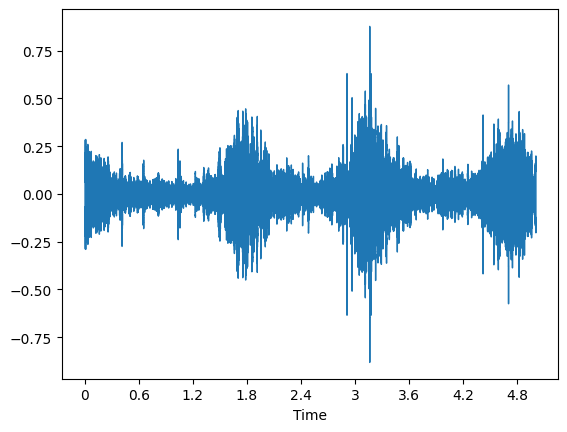

In [9]:
librosa.display.waveshow(signal, sr=sample_rate)

Instead of passing the raw input signal to train and audio classifier, you will use a frequency-based representation of the audio.
In particular, you will use a MEL spectrogram.
These kind of representations have proven to be powerful for audio classification.

In [10]:
mel_spectrogram = librosa.feature.melspectrogram(y = signal, sr = sample_rate, n_mels=128)
mel_spectrogram.shape

(128, 216)

The spectrogram calculates 128 MEL values, for 216 bins accross the time dimension.

Plot the spectrogram. The `power_to_db` function converts the amplitude-based spectrogram values into decibel values.

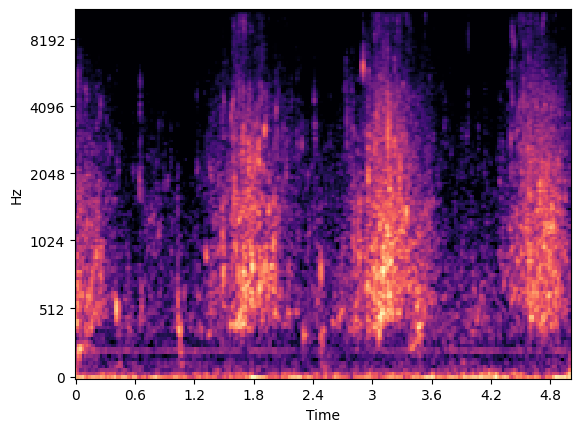

In [11]:
librosa.display.specshow(
    librosa.power_to_db(mel_spectrogram**2, ref=np.max),
    x_axis="time",
    y_axis="mel"
)
